# **House Price Prediction**

Data Source: https://www.kaggle.com/datasets/shree1992/housedata

## Loading the data

In [2]:
import pandas as pd

df = pd.read_csv('HousePricePrediction.csv')

Before we do anything we want to look at the data we have and determine what kind of data each column has. We can see we have some float type values for sqft_living, sqft_lot, sqft_above and sqft_basement, and then we have string types for geographical information and the rest are categorical variables. To evaluate this we need represent all the variables we will use in our model numerically.

## Data Exploration

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


We can use the describe function in pandas to look at some of the key features of our data. This can help identify the distribution of our data as well as properties like the min and max value for each variable.

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


For any prediction/regression models we need data to be numerical and of the same type. Here we can see we need to deal with non-numeric data types.

In [5]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [6]:
df.nunique(axis=0)

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

## Data Processing

To simplify the date field I break this down into month and year. The date, street, zipcode, country and year can all be deleted. The date field I have kept in another format so this can now be deleted. The street name and zipcode are in a very difficult format to work with and each value is too specific to tell us anything meaningful about how price varies with them. The country and year only have one value so this contains no information.

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df = df.drop(['date'],axis=1)
df = df.drop(['street'],axis=1)
df = df.drop(['statezip'],axis=1)
df = df.drop(['country'],axis=1)
df = df.drop(['year'],axis=1)

Using the label encoder each city is now automatically represented by a number from 1 to n (where n is the number of cities).

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])

All the remaining columns should now be a numeric data type and so we now convert all the remaining columns to type int64.

In [9]:
for col in df.columns:
    try:
        if df.dtypes[col]!='int64':
            df[col] = df[col].astype('int64')
    except ValueError:
        df.drop([col],axis=1)
        
# df.isnull().sum()

The correlation matrix gives us an initial look at which variables might be a better predictor of price. We can see living room size, amount of room upstairs and number of bathrooms have the highest correlation with price.

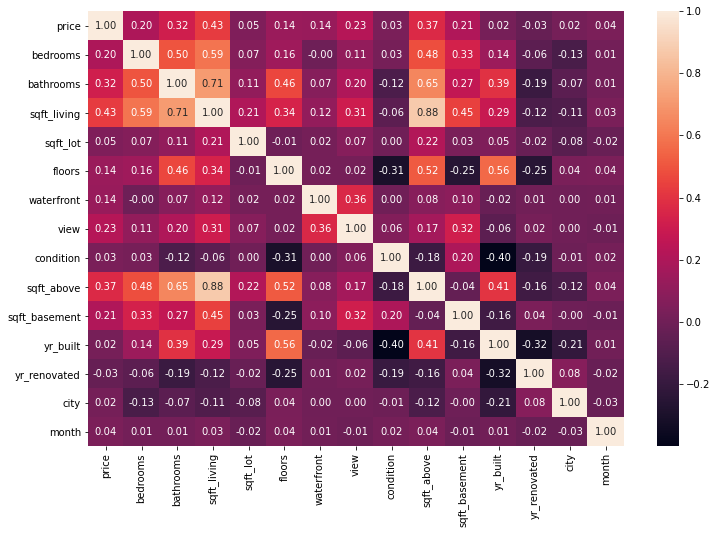

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

We can use the pairplot to visually see how each variable correlates with price. As the correlation matrix showed, the same variables mentioned before seem to have the strongest relationship with price.

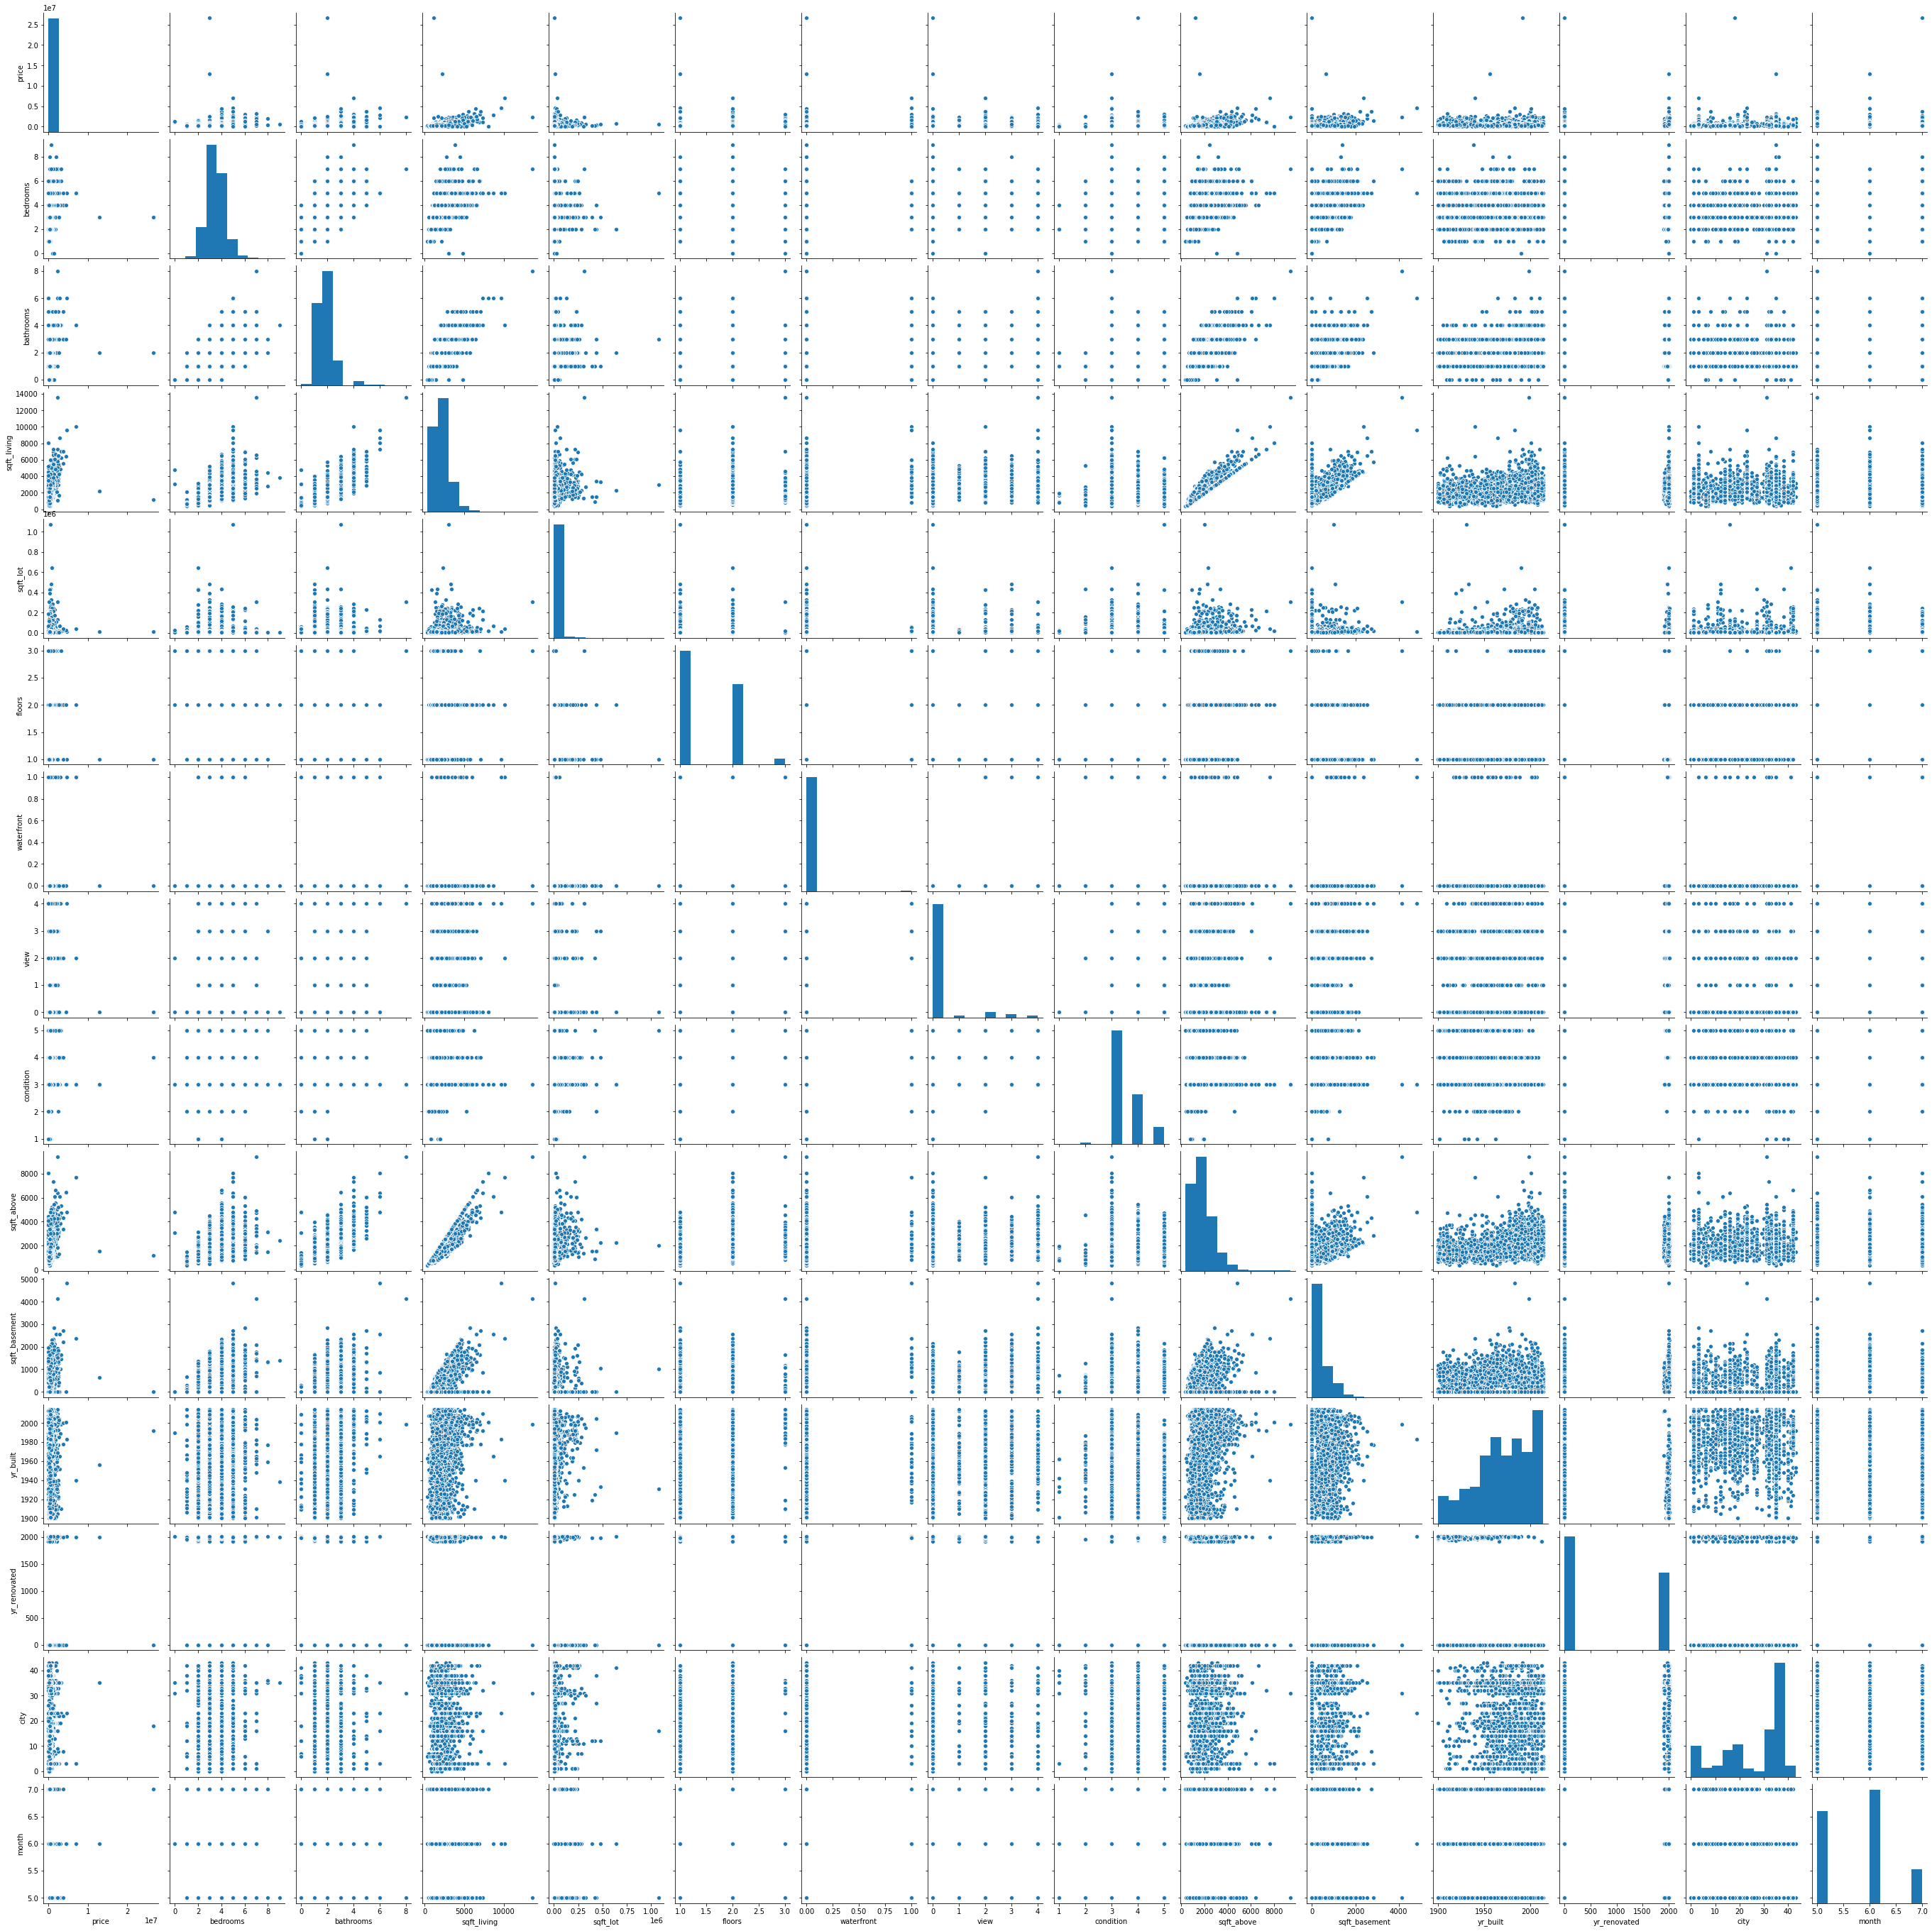

In [11]:
sns.pairplot(df)

We plot each variable against price to get a better look at the relationships but also where there any outliers so we can remove them.

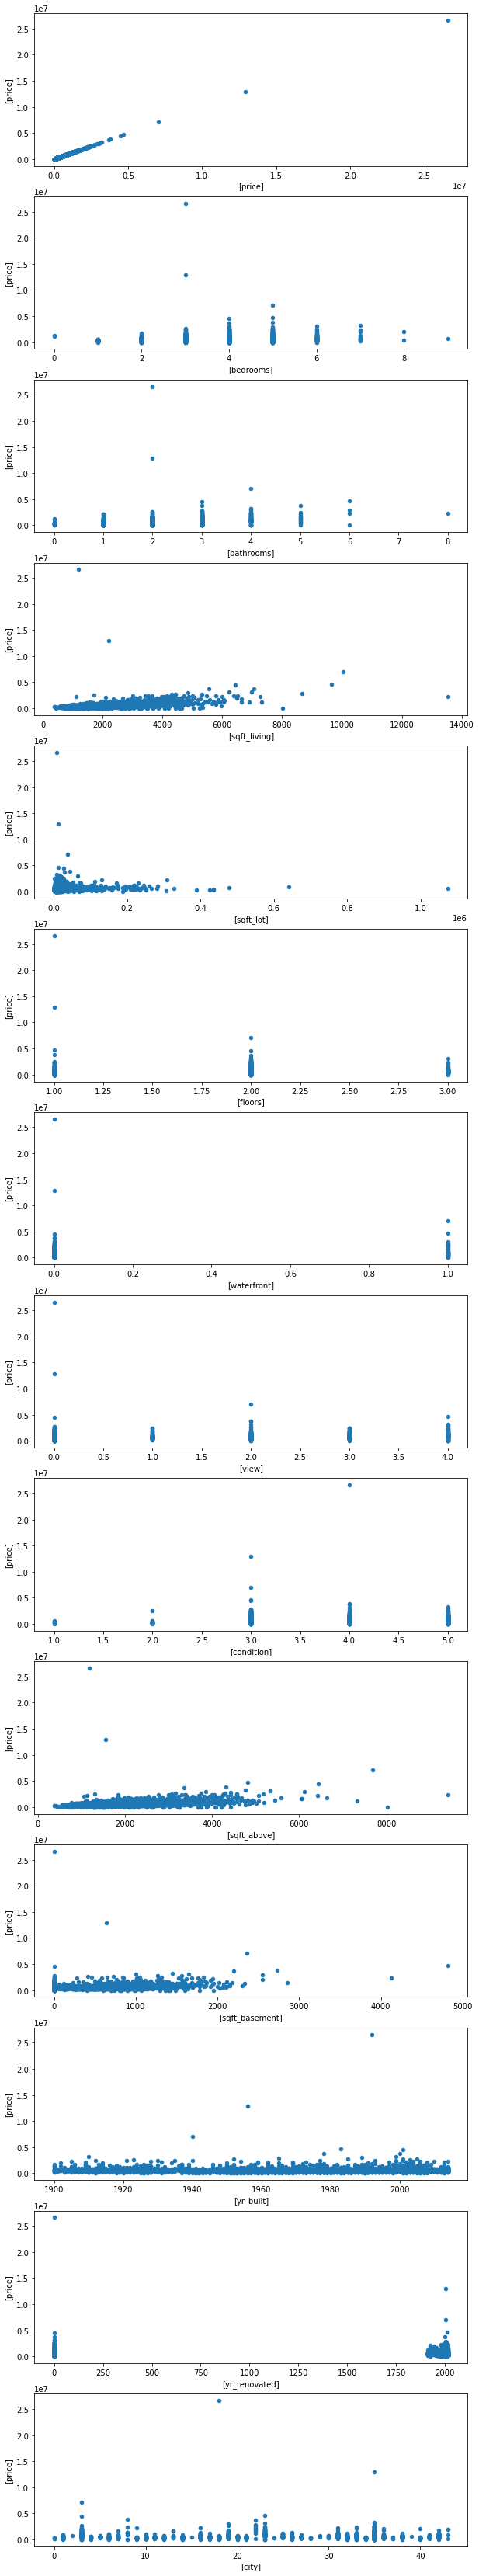

In [12]:
fig, axes = plt.subplots(len(df.columns.values)-1, 1)

for i, col in enumerate(df.columns.values[:-1]):
    df.plot(x=[col], y=['price'], kind="scatter", ax=axes[i], figsize=(10,60))

plt.show()

Looking at the plots we can determine the outliers and here they are removed.

## Data Cleansing

In [13]:
df.drop(df[df['price'] > 600000].index, inplace=True)
df.drop(df[df['price'] == 0].index, inplace=True)
df.drop(df[df['price'] < 10000].index, inplace=True)
df.drop(df[df['bedrooms'] == 0].index, inplace=True)
df.drop(df[df['bedrooms'] > 8].index, inplace=True)
df.drop(df[df['bathrooms'] == 0].index, inplace=True)
df.drop(df[df['bathrooms'] > 6].index, inplace=True)
df.drop(df[df['sqft_living'] > 5000].index, inplace=True)
df.drop(df[df['sqft_lot'] > 60000].index, inplace=True)
df.drop(df[(df['condition'] == 2) & (df['price'] > 200000)].index, inplace=True)
df.drop(df[(df['condition'] == 3) & (df['price'] > 400000)].index, inplace=True)
df.drop(df[df['sqft_above'] > 3500].index, inplace=True)
df.drop(df[df['sqft_basement'] > 2000].index, inplace=True)

The variables measuring square foot have much bigger values in them than some of the other variables. This is a problem as these might be considered to be more important by the model and receive higher weights even if they aren't as important in predicting price. To counter this we want all the variables to have roughly the same numerical range and so we standardize the variables with comparably large values.

In [14]:
cols = ['sqft_living','sqft_lot','sqft_above','sqft_basement']
for col in cols:
    df[col]=(df[col]-df[col].mean())/df[col].std()

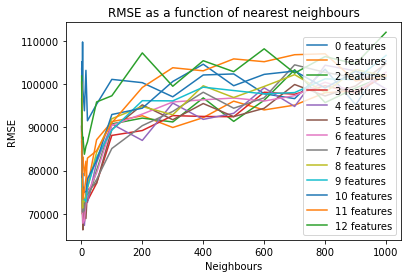

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import numpy as np
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from statistics import mean
import random

X = df.drop(['price'],axis=1)
y = df['price']
direction = ['forward', 'backward']

rmse_pca = []
neighbours = [1,2,3,4,5,10,15,20,50,100,200,300,400,500,600,700,800,900,1000]
# plt.title('RMSE with n neighbours')

rmse = {}
for i in range(1,14):
    key = 'rmse_'+str(i)
    value = []
    rmse[key] = value 
    
for i in range(1,np.shape(df)[1]-1):
    key = 'rmse_'+str(i)
    for j in neighbours:
        sfs = SequentialFeatureSelector(KNeighborsRegressor(n_neighbors=j),n_features_to_select=i, direction='forward')
        X_ = sfs.fit_transform(X, y)
        y_ = y.to_numpy()
        X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=random.randint(0,100))
        model = KNeighborsRegressor(n_neighbors=j).fit(X_train,y_train)
        average = []
        rmse_sfs = []
        for k in range(50):
            y_pred = model.predict(X_test)
            rmse_knn = np.sqrt(mean_squared_error(y_test,y_pred))
            average.append(rmse_knn)
        rmse[key].append(mean(average))
    plt.plot(neighbours, rmse[key])
    
plt.title('RMSE as a function of nearest neighbours')
plt.legend(labels=['{} features'.format(i) for i in range(14)])
plt.xlabel('Neighbours')
plt.ylabel('RMSE')
plt.show()
        
# rmse = [rmse for rmse,i,j,d in rmse_sfs]
# min_index = rmse.index(min(rmse))
            
# print('Optimal settings for knn using feature selection is {} selection, with {} features and using the nearest {} neighbours, giving a minimum\
#       rmse of {}'.format(rmse_sfs[min_index][3],rmse_sfs[min_index][1],rmse_sfs[min_index][2],rmse_sfs[min_index][0]))

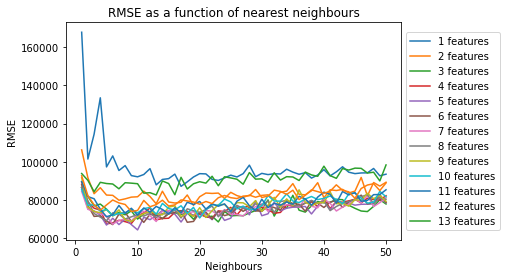

The optimal settings occur with 5 features using the 10-nearest neighbours, giving a RMSE of 73236.44066372754


In [136]:
X = df.drop(['price'],axis=1)
y = df['price']
direction = ['forward', 'backward']

rmse_pca = []
neighbours = [n for n in range(1,51)]
# plt.title('RMSE with n neighbours')

rmse = {}
for i in range(1,14):
    key = 'rmse_'+str(i)
    value = []
    rmse[key] = value 
    
for i in range(1,np.shape(df)[1]-1):
    key = 'rmse_'+str(i)
    for j in neighbours:
        sfs = SequentialFeatureSelector(KNeighborsRegressor(n_neighbors=j),n_features_to_select=i, direction='forward')
        X_ = sfs.fit_transform(X, y)
        y_ = y.to_numpy()
        X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=random.randint(0,100))
        model = KNeighborsRegressor(n_neighbors=j).fit(X_train,y_train)
        average = []
        rmse_sfs = []
        for k in range(50):
            y_pred = model.predict(X_test)
            rmse_knn = np.sqrt(mean_squared_error(y_test,y_pred))
            average.append(rmse_knn)
        rmse[key].append(mean(average))
    plt.plot(neighbours, rmse[key])
    
plt.title('RMSE as a function of nearest neighbours')
plt.legend(labels=['{} features'.format(i) for i in range(1,14)], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Neighbours')
plt.ylabel('RMSE')
plt.show()

rmse_min = []
rmse_minindex = []

for i in range(1,14):
    key = 'rmse_'+str(i)
    rmse_min.append(min(rmse[key]))                 #record each minimum value for each key
    rmse_minindex.append(rmse[key].index(min(rmse[key])))     #record the location of each minimum value for each key
    
n = rmse_minindex[rmse_min.index(min(rmse_min))]     #record location of min value across all keys
key = 'rmse_'+str(n+1)

print('The optimal settings occur with {} features using the {}-nearest neighbours, giving a RMSE of {}'.format(rmse_min.index(min(rmse_min))+1, neighbours[n], rmse[key][n]))

In [137]:
rmse['rmse_5'][9]

64314.16691418115

Optimal settings for knn using pca is using the nearest 84 neighbours, giving an average      rmse of 103446.27928553164


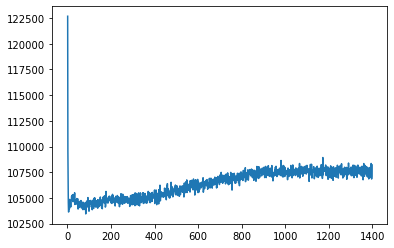

In [39]:
pca = PCA(n_components=0.99)
X_ = pca.fit_transform(X)
y_ = y.to_numpy()
neighbours = [i for i in range(1,1400)]
rmse_pca = []

for n in neighbours:
    average = []
    for j in range(50):
        X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=random.randint(0,100))
        model = KNeighborsRegressor(n_neighbors=n).fit(X_train,y_train)
        y_pred = model.predict(X_test)
        rmse_knn = np.sqrt(mean_squared_error(y_test,y_pred))
        average.append(rmse_knn)
    rmse_pca.append(mean(average))
    
min_index = rmse_pca.index(min(rmse_pca))
plt.plot(neighbours, rmse_pca)

print('Optimal settings for knn using pca is using the nearest {} neighbours, giving a minimum\
      rmse of {}'.format(neighbours[min_index],rmse_pca[min_index]))

## Model Implementation - Linear Regression

Here we implement a feature selection model on the data which works by the user deciding on a number of features to keep and the model can then either start from nothing and keep adding the variable which has the biggest impact in prediction performance, or start from all variables and work backwards by removing the variable which provides the least impact in prediction performance. This model is evaluated for all number of features to keep and we have run this through a linear regression model and used the Root Mean Square Error (RMSE) to evaluate the performance. The plots show that for either selection method, around 8 variables were optimal to keep.

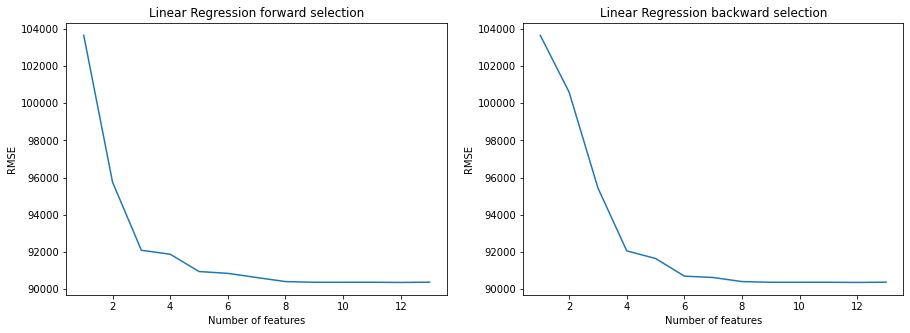

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
X = df.drop(['price'],axis=1)
y = df['price']
direction = ['forward', 'backward']
col = 0

for d in direction:
    features = []
    errors = []
    for i in range(1,len(X.columns)):
        sfs = SequentialFeatureSelector(LinearRegression(),n_features_to_select=i, direction=d)
    #     features = sfs.fit(X, y).get_feature_names_out(input_features=None)
        X_ = sfs.fit_transform(X, y)
        y_ = y.to_numpy()
        X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

        model = LinearRegression().fit(X_train,y_train)
        y_pred = model.predict(X_test)
        features.append(i)
        errors.append(np.sqrt(mean_squared_error(y_test,y_pred)))

    axs[col].plot(features,errors)
    axs[col].set_title('Linear Regression {} selection'.format(d))
    
    for ax in axs.flat:
        ax.set(xlabel='Number of features', ylabel='RMSE')
    
    col += 1

Using the number of features determined to be optimal from the above plots, I then ran a linear regression using these features as inputs and plotted the prediction prices against the test data. The plots show that the predictions were quite similar to the actual values.

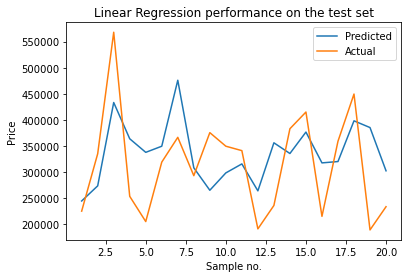

In [64]:
X = df.drop(['price'],axis=1)
y = df['price']
sfs = SequentialFeatureSelector(LinearRegression(),n_features_to_select=12, direction='backward')
X_ = sfs.fit_transform(X, y)
y_ = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

model = LinearRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test,y_pred))

x = [i+1 for i in range(len(np.array(y_pred)))]
plt.plot(x[0:20],y_pred[0:20],label='Predicted')
plt.plot(x[0:20],y_test[0:20], label='Actual')
plt.xlabel("Sample no.")
plt.ylabel("Price")
plt.title("Linear Regression performance on the test set")
plt.legend()

## Model Implementation - K-Nearest Neighbours (KNN)

We again evaluated the optimal number of features to keep but this time evaluating performace on a KNN algorithm. Here 2 or 3 features looked to be optimal.

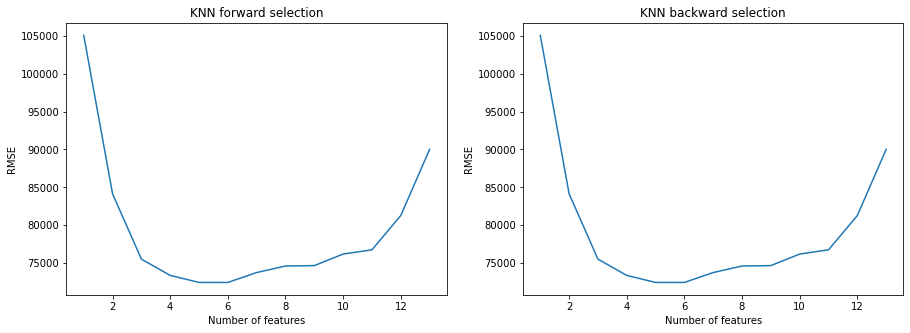

In [62]:
from sklearn.neighbors import KNeighborsRegressor

fig, axs = plt.subplots(1, 2, figsize=(15,5))
X = df.drop(['price'],axis=1)
y = df['price']
knn = KNeighborsRegressor(n_neighbors=5)
direction = ['forward', 'backward']
col = 0

for d in direction:
    features = []
    errors = []
    for i in range(1,len(X.columns)):
        sfs = SequentialFeatureSelector(knn,n_features_to_select=i, direction=d)
        X_ = sfs.fit_transform(X, y)
        y_ = y.to_numpy()
        X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

        model = knn.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        features.append(i)
        errors.append(np.sqrt(mean_squared_error(y_test,y_pred)))

    axs[col].plot(features,errors)
    axs[col].set_title('KNN {} selection'.format(d))
    
    for ax in axs.flat:
        ax.set(xlabel='Number of features', ylabel='RMSE')
    
    col += 1

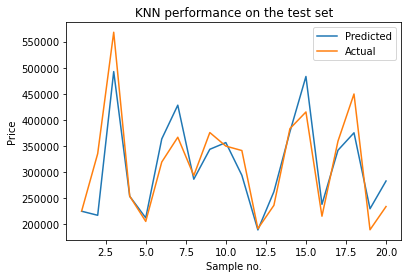

In [65]:
X = df.drop(['price'],axis=1)
y = df['price']
sfs = SequentialFeatureSelector(knn,n_features_to_select=6, direction='backward')
X_ = sfs.fit_transform(X, y)
y_ = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

model = knn.fit(X_train,y_train)
y_pred = model.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_test,y_pred))

x = [i+1 for i in range(len(np.array(y_pred)))]
plt.plot(x[0:20],y_pred[0:20],label='Predicted')
plt.plot(x[0:20],y_test[0:20], label='Actual')
plt.xlabel("Sample no.")
plt.ylabel("Price")
plt.title("KNN performance on the test set")
plt.legend()

## Model Implementation - Random Forest

Finally we evaluated the data on 6 features using a random forest regressor, and as we can see the performance was generally slightly worse than that of the previous two algorithms.

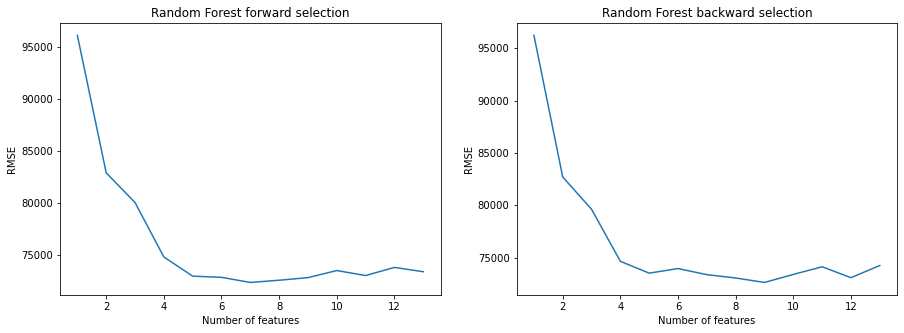

In [63]:
from sklearn.ensemble import RandomForestRegressor

fig, axs = plt.subplots(1, 2, figsize=(15,5))
X = df.drop(['price'],axis=1)
y = df['price']
direction = ['forward', 'backward']
col = 0

for d in direction:
    features = []
    errors = []
    for i in range(1,len(X.columns)):
        sfs = SequentialFeatureSelector(RandomForestRegressor(),n_features_to_select=i, direction=d)
        X_ = sfs.fit_transform(X, y)
        y_ = y.to_numpy()
        X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

        model = RandomForestRegressor().fit(X_train,y_train)
        y_pred = model.predict(X_test)
        features.append(i)
        errors.append(np.sqrt(mean_squared_error(y_test,y_pred)))

    axs[col].plot(features,errors)
    axs[col].set_title('Random Forest {} selection'.format(d))
    
    for ax in axs.flat:
        ax.set(xlabel='Number of features', ylabel='RMSE')
    
    col += 1

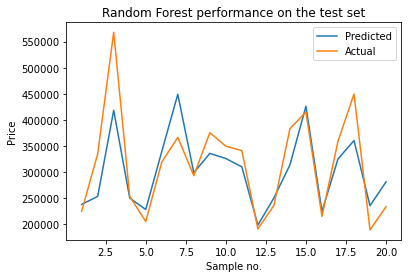

In [66]:
X = df.drop(['price'],axis=1)
y = df['price']
sfs = SequentialFeatureSelector(RandomForestRegressor(),n_features_to_select=7, direction='backward')
X_ = sfs.fit_transform(X, y)
y_ = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

model = RandomForestRegressor().fit(X_train,y_train)
y_pred = model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test,y_pred))

x = [i+1 for i in range(len(np.array(y_pred)))]
plt.plot(x[0:20],y_pred[0:20],label='Predicted')
plt.plot(x[0:20],y_test[0:20], label='Actual')
plt.xlabel("Sample no.")
plt.ylabel("Price")
plt.title("Random Forest performance on the test set")
plt.legend()

[Text(0, 0.5, 'RMSE')]

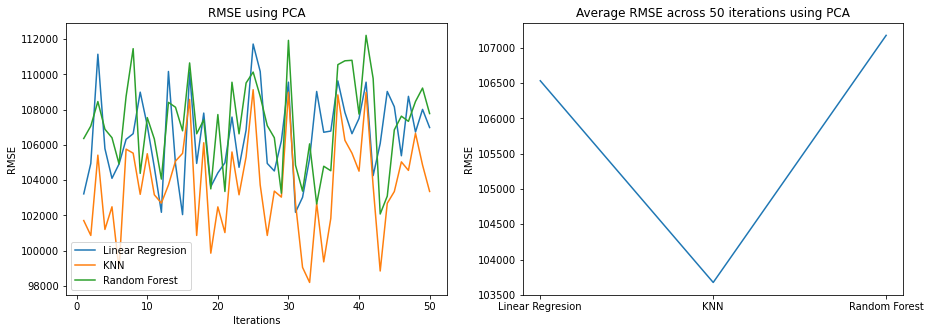

In [51]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from statistics import mean
import random

rmse = []
iters = []
pca = PCA(n_components=0.95)
X_ = pca.fit_transform(X)
y_ = y.to_numpy()

for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=random.randint(0,100))

    lr = LinearRegression().fit(X_train,y_train)
    knn = KNeighborsRegressor(n_neighbors=5).fit(X_train,y_train)
    rf = RandomForestRegressor().fit(X_train,y_train)
    y_pred_lr = lr.predict(X_test)
    y_pred_knn = knn.predict(X_test)
    y_pred_rf = rf.predict(X_test)
    rmse.append([np.sqrt(mean_squared_error(y_test,y_pred_lr)), np.sqrt(mean_squared_error(y_test,y_pred_knn)), np.sqrt(mean_squared_error(y_test,y_pred_rf))])
    iters.append(i+1)

lr = [lr for lr,knn,rf in rmse]   
knn = [knn for lr,knn,rf in rmse]
rf = [rf for lr,knn,rf in rmse]

fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(iters,lr)
ax[0].plot(iters,knn)
ax[0].plot(iters,rf)
ax[0].title.set_text('RMSE using PCA')
ax[0].legend(['Linear Regresion','KNN','Random Forest'])
ax[0].set(xlabel='Iterations', ylabel='RMSE')

ax[1].plot(['Linear Regresion','KNN','Random Forest'],[mean(lr),mean(knn),mean(rf)])
ax[1].title.set_text('Average RMSE across 50 iterations using PCA')
ax[1].set(ylabel='RMSE')

## Discussion

In [67]:
rmse = {'Linear Regression':rmse_lr, 'KNN':rmse_knn, 'Random Forest':rmse_rf}

print('Linear Regression RMSE: ', rmse_lr)
print('KNN RMSE: ', rmse_knn)
print('Random Forest RMSE: ', rmse_rf)
print('')
print('{} was the best performing model'.format(min(rmse)))

Linear Regression RMSE:  90365.90549084784
KNN RMSE:  72452.34277105451
Random Forest RMSE:  72606.08073162266

KNN was the best performing model


Overall the Random Forest had the lowest RMSE on the test set. The KNN and Random Forest performed significantly better than the Linear Regression and the KNN was only marginally worse than the Random Forest based its RMSE. It would be interesting to see how changing various parameters, such as the number of nearest neighbours in the KNN, would impact the performance on this dataset.